# Lab Segmentation 2

In [293]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [294]:
def get_threshold(img):
    if (np.max(img) <= 1):
        img = img * 255;

    
    img_new = img.astype('uint8')
    
    #image_hist = histogram(img_new)
    #H = np.zeros(img_new.shape[0] * img_new.shape[1])
    #H[image_hist[1][0] : image_hist[1][len(image_hist[1]) - 1] + 1] = image_hist[0]

    img_new_hist = np.array(histogram(img_new))

    ##print(img_new_hist)

    pixel_cumsum = np.cumsum(img_new_hist[0])
    mult_cumsum = np.cumsum(img_new_hist[0] * img_new_hist[1])
    
    t_init = round(mult_cumsum[-1] / pixel_cumsum[-1])
    
    t_current = int(t_init)
    t_old = t_current + 1
    while abs(t_current - t_old) > 0.1:
        lower_t = img_new_hist[1][0:int(t_current) - img_new_hist[1][0]]
        upper_t = img_new_hist[1][int(t_current)- img_new_hist[1][0]:]
        

        ##print("length of lower_T", len(lower_t))
        lower_p = img_new_hist[0][:int(t_current)- img_new_hist[1][0]]
        upper_p = img_new_hist[0][int(t_current)- img_new_hist[1][0]:]

        ##print("lower_p", len(lower_p))
        ##print("upper_p", len(upper_p))
        
        pixel_cumsum_lower = np.cumsum(lower_p)
        mult_cumsum_lower = np.cumsum(lower_t * lower_p)

        pixel_cumsum_upper = np.cumsum(upper_p)
        mult_cumsum_upper = np.cumsum(upper_t * upper_p)
    
        t_lower = round(mult_cumsum_lower[-1] / pixel_cumsum_lower[-1])
        ##print("upper:", len(mult_cumsum_upper), ", ", len(pixel_cumsum_upper) )
        t_upper = round(mult_cumsum_upper[-1] / pixel_cumsum_upper[-1])
        #print("average lower", t_lower)
        #print("average upper", t_upper)
        t_old = t_current
        t_current = (t_lower + t_upper) / 2
        #print("t_current", t_current)

    return t_old

138.0


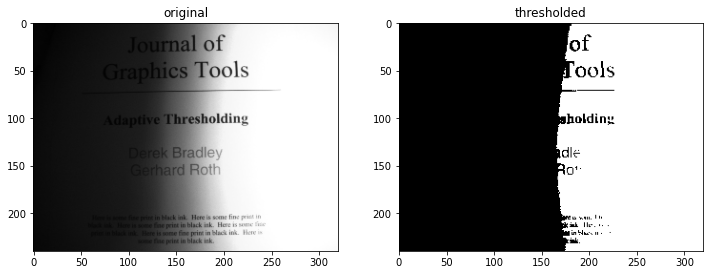

143.0


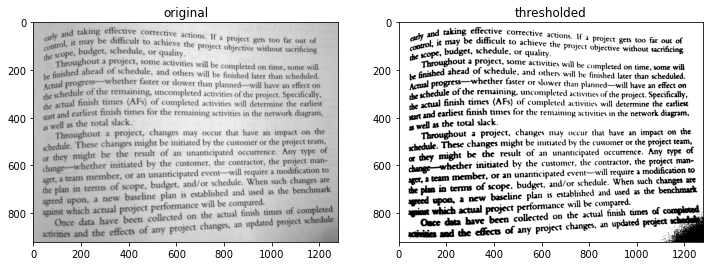

88.0


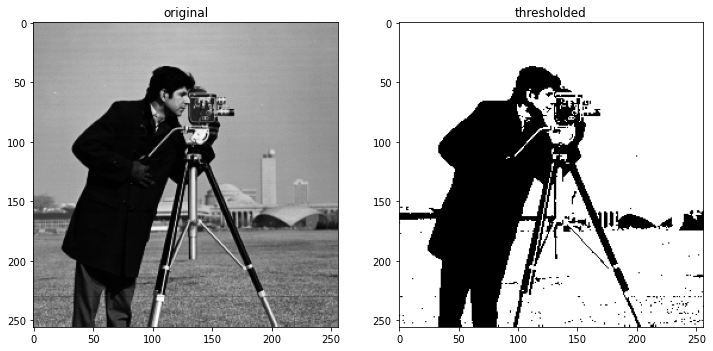

142.0


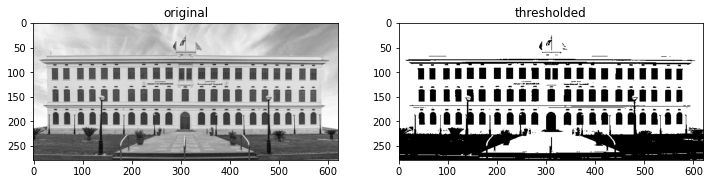

In [295]:
# image 1
img1 = io.imread('./book.png', as_gray=True)
threshold1 = get_threshold(img1)
img1_new = np.copy(img1)
img1_new[img1 >= threshold1] = 255
img1_new[img1 < threshold1] = 0

print(threshold1)
show_images([img1, img1_new], ["original", "thresholded"])

# image 2
img2 = io.imread('./book1.png', as_gray=True)
img2 = np.array(img2) * 255
threshold2 = get_threshold(img2)
img2_new = np.copy(img2)
img2_new[img2 >= threshold2] = 255
img2_new[img2 < threshold2] = 0

print(threshold2)
show_images([img2, img2_new], ["original", "thresholded"])

# img 3
img3 = io.imread('./cameraman.png', as_gray= True)
threshold3 = get_threshold(img3)
img3_new = np.copy(img3)
img3_new[img3 >= threshold3] = 255
img3_new[img3 < threshold3] = 0

print(threshold3)
show_images([img3, img3_new], ["original", "thresholded"])

# img 4
img4 = io.imread('./cufe.png', as_gray= True)
img4 = np.array(img4) * 255
threshold4 = get_threshold(img4)
img4_new = np.copy(img4)
img4_new[img4 >= threshold4] = 255
img4_new[img4 < threshold4] = 0

print(threshold4)
show_images([img4, img4_new], ["original", "thresholded"])

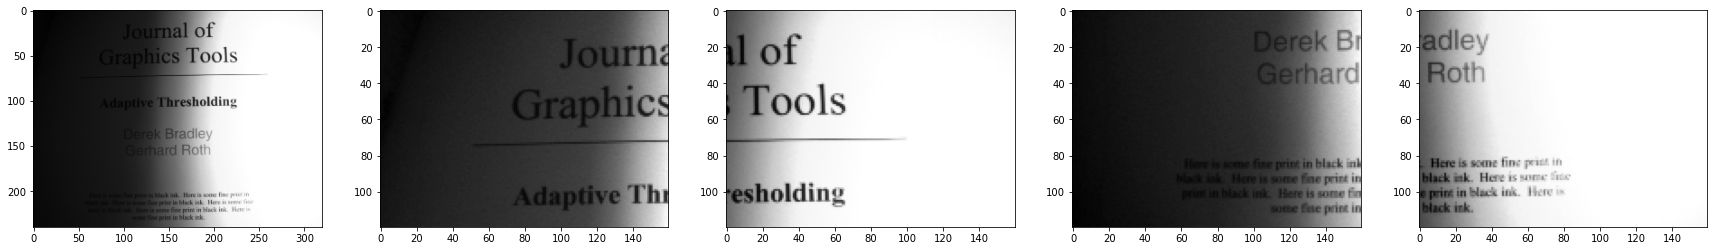

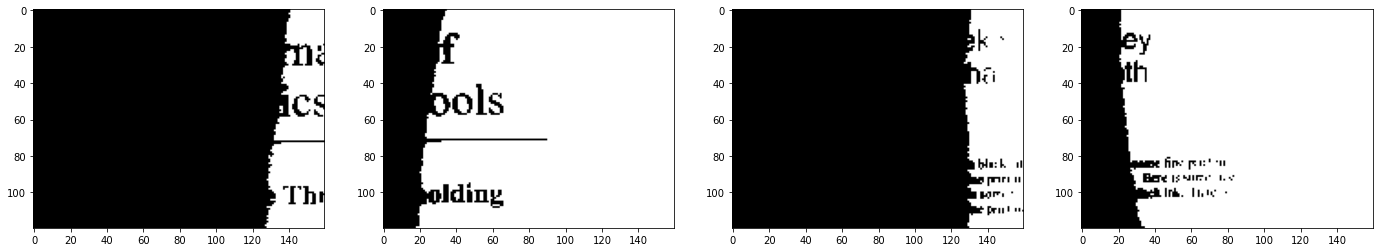

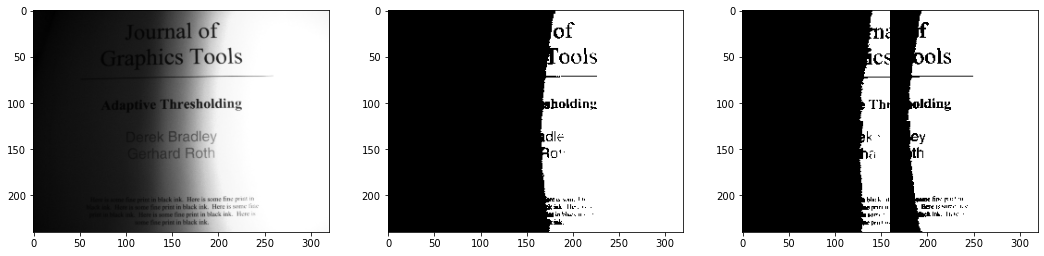

In [296]:
book = np.array(io.imread('book.png'))
threshold = get_threshold(book)



w = book.shape[0]
h = book.shape[1]

book_new = np.copy(book)

book00 = book_new[:w//2,:h//2]
book01 = book_new[:w//2,h//2:]
book10 = book_new[w//2:,:h//2]
book11 = book_new[w//2:,h//2:]
show_images([book, book00, book01, book10, book11], ["","","","",""])

T00 = get_threshold(book00)
T01 = get_threshold(book01)
T10 = get_threshold(book10)
T11 = get_threshold(book11)

book00[book00 < T00] = 0
book00[book00 >=T00] = 255
book01[book01 < T01] = 0
book01[book01 >=T01] = 255
book10[book10 < T10] = 0
book10[book10 >=T10] = 255
book11[book11 < T11] = 0
book11[book11 >=T11] = 255


img_global = np.copy(book)
img_global[img_global < threshold] = 0
img_global[img_global >= threshold] = 255

img_local = np.copy(book)

img_local[:w//2,:h//2] = book00
img_local[:w//2,h//2:] = book01
img_local[w//2:,:h//2] = book10
img_local[w//2:,h//2:] = book11

show_images([book00, book01, book10, book11], ["","","",""])
show_images([book, img_global, img_local], ["","",""])


img3 = np.copy(book)


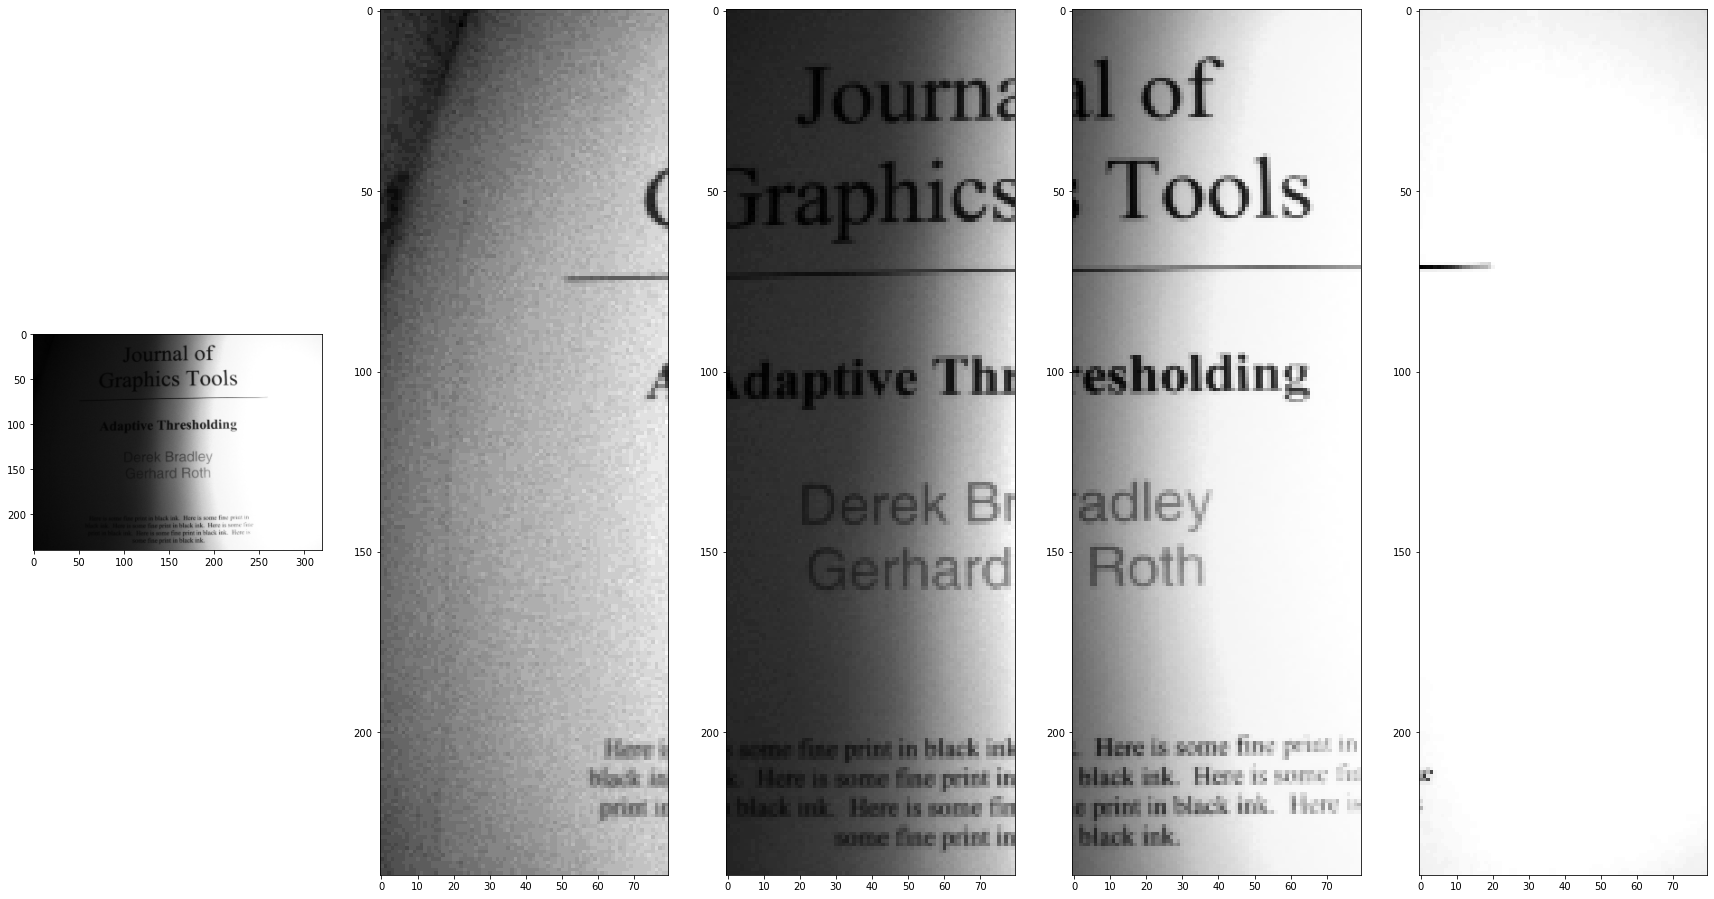

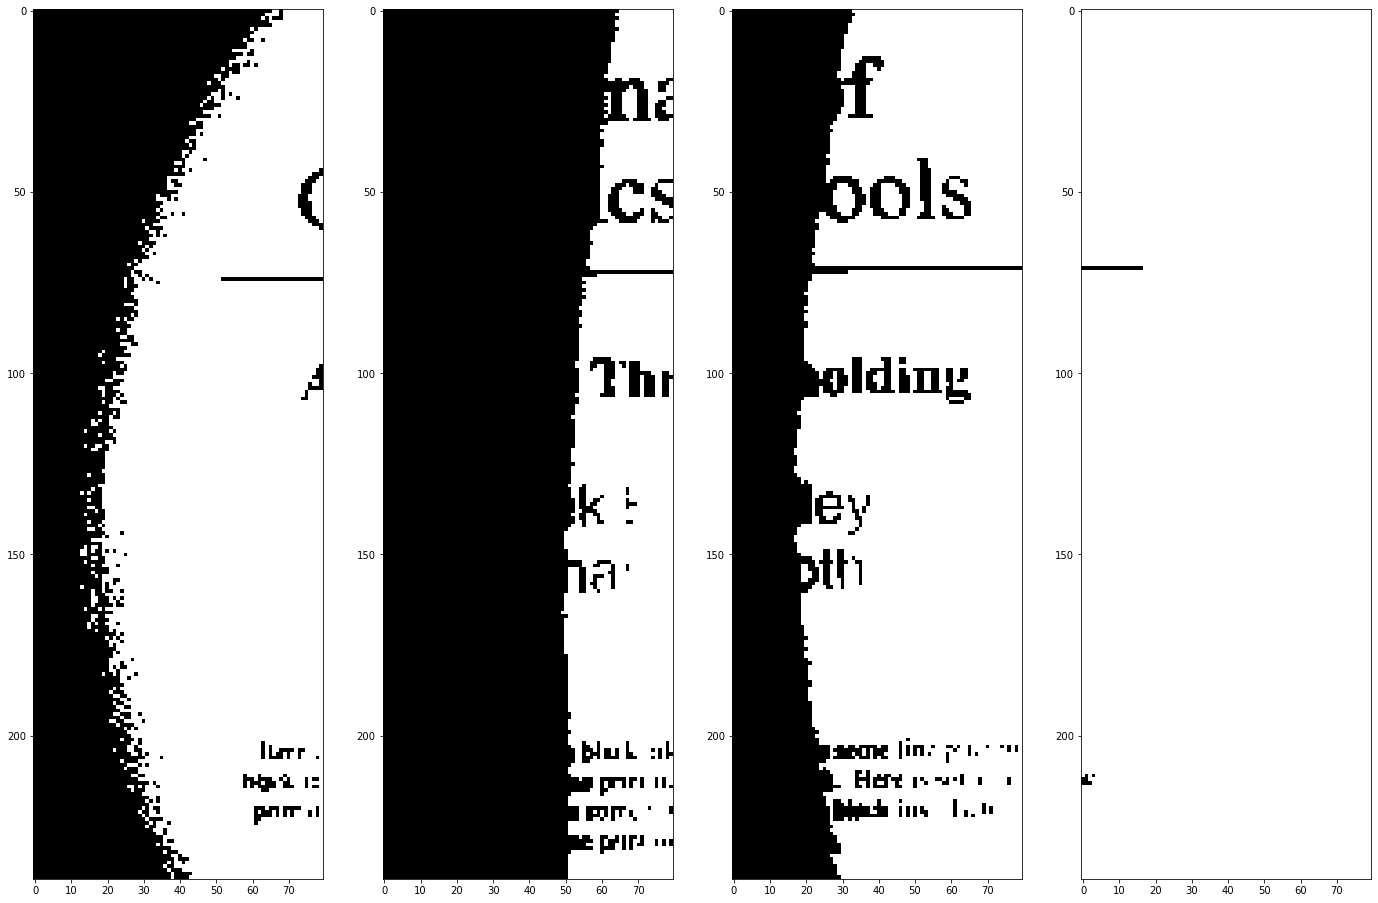

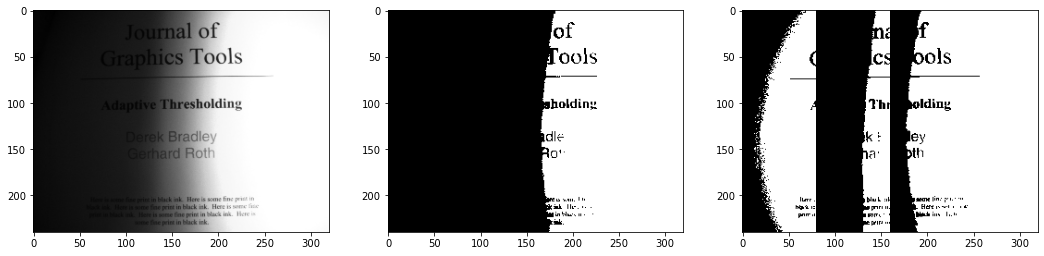

In [297]:
book = np.array(io.imread('book.png'))
threshold = get_threshold(book)



w = book.shape[0]
h = book.shape[1]

book_new = np.copy(book)

book00 = book_new[:w,:h//4]
book01 = book_new[:w,h//4:2*(h//4)]
book10 = book_new[:w,2*(h//4):3*(h//4)]
book11 = book_new[:w,3*(h//4):]
show_images([book, book00, book01, book10, book11], ["","","","",""])

T00 = get_threshold(book00)
T01 = get_threshold(book01)
T10 = get_threshold(book10)
T11 = get_threshold(book11)

book00[book00 < T00] = 0
book00[book00 >=T00] = 255
book01[book01 < T01] = 0
book01[book01 >=T01] = 255
book10[book10 < T10] = 0
book10[book10 >=T10] = 255
book11[book11 < T11] = 0
book11[book11 >=T11] = 255


img_global = np.copy(book)
img_global[img_global < threshold] = 0
img_global[img_global >= threshold] = 255

img_local = np.copy(book)

img_local[:w,:h//4] = book00
img_local[:w,h//4:2*(h//4)] = book01
img_local[:w,2*(h//4):3*(h//4)] = book10
img_local[:w,3*(h//4):] = book11

show_images([book00, book01, book10, book11], ["","","",""])
show_images([book, img_global, img_local], ["","",""])


img3 = np.copy(book)